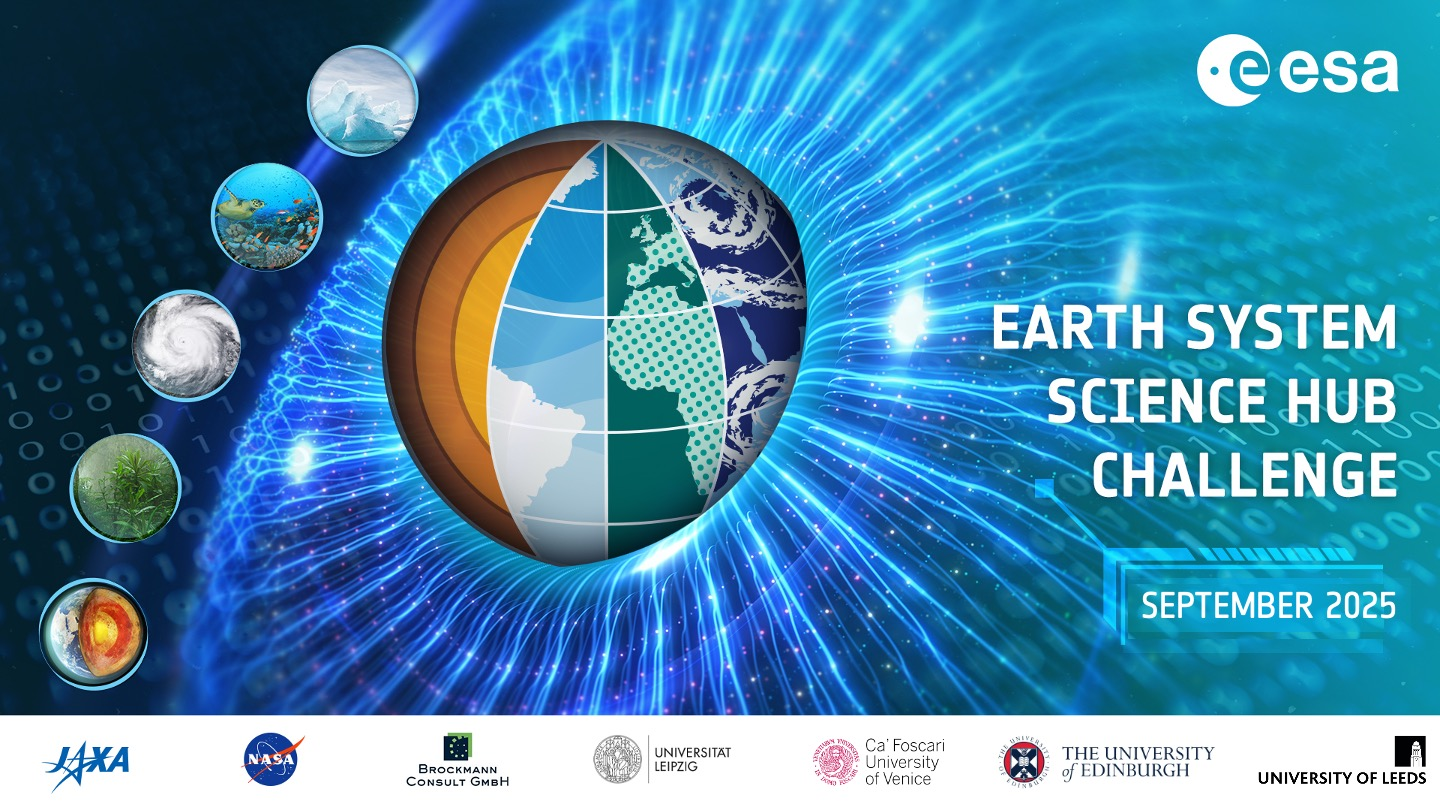

# PART 1: SUMMARY

<hr>

# <a id='section1'></a><span style='color:DarkCyan'> 1. Title </center> </span>
**Author(s):** Paula Romero Jure, Giacomo Roversi and Filippo Calì Quaglia <br>
**Group name:**  - <br> 
**Challenge:** 1. Clouds and aerosols interactions from EarthCare <br> 

**Submission date:** 30/09/2025 <br> 

<br> 


# <a id='section2'></a><span style='color:DarkCyan'> 2. Description </center> </span>

### Description of research approach
Please use this space to provide short description to the scientific problem you tackle in this notebook. Provide short information on what would you like to achieve. 



# <a id='section3'></a><span style='color:DarkCyan'> 3. Table of Contents </center> </span> 

 1. [Title](#section1)
 2. [Description](#section2)
 3. [Table of Contents](#section3)
 4. [References](#section4)
 5. [Key Conclusions](#section5)
 6. [Societal Context](#section6)
 7. [Import libraries](#section7)
 8. [Access dataset](#section8)
 9. [Analysis cells](#section9)


# <a id='section4'></a><span style='color:DarkCyan'> 4. References </center> </span>

- EarthCARE Product Data Handbook: https://earthcarehandbook.earth.esa.int/catalogue

- Wildfires in Southeast Asia pollute the atmosphere in the northern South China Sea - ScienceDirect

- Wildfires 2025 review: ASEAN reduces emissions, but haze persists | Copernicus

- AMT - Cloud top heights and aerosol layer properties from EarthCARE lidar observations: the A-CTH and A-ALD products

- GMD - Estimation of aerosol and cloud radiative heating rate in the tropical stratosphere using a radiative kernel method

- Microphysical fingerprints in anvil cloud albedo

- Grabowski and Morrison, 35 2016;

- Heikenfeld et al., 2019;

- Igel and van den Heever, 2021;

- Barthlott et al., 2022;

- Varble et al., 2023




# <a id='section5'></a><span style='color:DarkCyan'> 5. Key Conclusions </center> </span>

Please explain briefly the results of your exploration and the key conclusions that you reached.

# <a id='section6'></a><span style='color:DarkCyan'> 6. Societal Context </center> </span>

Please explain briefly why this is important for society.


# PART 2: SCIENTIFIC EXPLOITATION AND ANALYSIS

<hr>

# <a id='section7'></a><span style='color:DarkCyan'> 7. Import Libraries </center> </span>

In [1]:
# Install required libraries and packages with conda
#%conda install -y -c conda-forge numpy scipy xarray pandas h5py h5netcdf netcdf4 cftime zarr pystac-client fsspec matplotlib tqdm aiohttp requests ipykernel seaborn scikit-learn cartopy

In [2]:
# Import libraries
from pystac_client import Client
import fsspec
import xarray as xr
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd 
import requests
from IPython.display import Image, display
import os 
import pathlib
from tqdm import tqdm

from scipy import stats  # will use scipy.stats.mode as the reducer
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle


from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


/home/jovyan/conda_envs/earthcare/lib/python3.13/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


# <a id='section8'></a><span style='color:DarkCyan'> 8. Data sources </center> </span>

Please update the table with information about dataset used for your specific case. *Table below provides just an example of the available variable description, please update it according to your case study!* <br> 

| Datacube name | Variable name| Description  | Reference* | Region | Time range | Resolution | 
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|:-----------------:|:-----------------:|
| (ESDC) v3.0.1 | air_temperature_2m | <a href="https://deepesdl.readthedocs.io/en/latest/datasets/ESDC/#air_temperature_2m" target="_blank">metadata description</a> | <a href="https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overviewhttps://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview" target="_blank">link to source</a> | region name | temporal reoslution | spatial resolution | <br>
|ATL_ALD_2A| <br>
|CPR_CLD_2A| <br>
|AC__TC__2B| <br>

*:*In case your dataset is not incorporated in public xcube store, please indicate the location of your dataset in these other repositories by updating* <b> Reference</b> *field*.


Here you can start with accessing the relevant data for your project 

In [3]:
# CODE SECTION

# <a id='section9'></a><span style='color:DarkCyan'> 9. Analysis cells </center> </span>


Please comment your code, describe the functions, remove dead and unreachable code.  


In [4]:
# CODE SECTION

In [5]:
catalog_url = 'https://catalog.maap.eo.esa.int/catalogue/'
catalog = Client.open(catalog_url)
EC_COLLECTION = ['EarthCAREL2Validated_MAAP']

In [6]:
# Geographic areas
geoboxes = {
    "WestPacific":[ 100,   0,  160,  20],  # [ 100, -15,  160, 30]
    "EastPacific":[-160,   0, -100,  20], # [-160, -10, -100, 20]
    "Antarctica1": [ 160, -80,  180, -60],
    "Antarctica2": [ -180, -80, -140, -60],

}

# EarthCARE products
products = ["ATL_ALD_2A", "CPR_CLD_2A", "AC__TC__2B"]

In [7]:
[geoboxes[i] for i in geoboxes]

[[100, 0, 160, 20],
 [-160, 0, -100, 20],
 [160, -80, 180, -60],
 [-180, -80, -140, -60]]

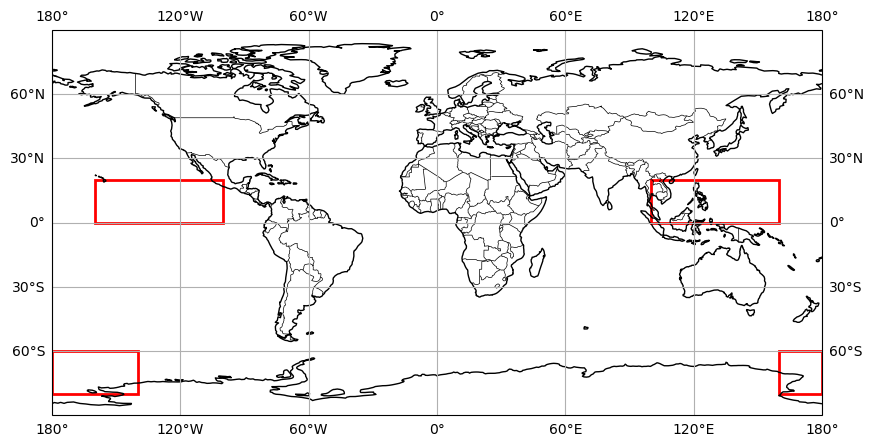

In [8]:
# Crea mappa
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.gridlines(draw_labels=True)

# Aggiungi i box
for lon_min, lat_min, lon_max, lat_max in [geoboxes[i] for i in geoboxes]:
    width = lon_max - lon_min
    height = lat_max - lat_min
    rect = Rectangle(
        (lon_min, lat_min), width, height,
        linewidth=2, edgecolor='red', facecolor='none',
        transform=ccrs.PlateCarree()
    )
    ax.add_patch(rect)

plt.show()


In [ ]:
# TODO Spostare leggermente i box?

In [9]:
geoboxes["Antarctica1"]

[160, -80, 180, -60]

In [10]:
search = catalog.search(
    collections=EC_COLLECTION, 
    filter="productType = 'CPR_CLD_2A' and (frame = 'G' or frame = 'F'or frame='H')", # Filter by product type
    bbox = geoboxes["Antarctica1"],
    #datetime = ['2025-06-06T00:00:00Z', None] 
    method = 'GET', # This is necessary 
    max_items=1e3 #5  # Adjust as needed, given the large aoutn of products it is recommended to set a limit
)

items = list(search.items())
print(f"Accessing {len(items)} items (limited by max_items).")
print(f"{search.matched()} items found that matched the query.")

Accessing 938 items (limited by max_items).
938 items found that matched the query.


In [11]:
search = catalog.search(
    collections=EC_COLLECTION, 
    filter="productType = 'CPR_CLD_2A' and (frame = 'G' or frame = 'F'or frame='H')", # Filter by product type
    bbox = geoboxes["Antarctica2"],
    #datetime = ['2025-06-06T00:00:00Z', None] 
    method = 'GET', # This is necessary 
    max_items=1e3 #5  # Adjust as needed, given the large aoutn of products it is recommended to set a limit
)

items = list(search.items())
print(f"Accessing {len(items)} items (limited by max_items).")
print(f"{search.matched()} items found that matched the query.")

Accessing 1000 items (limited by max_items).
1424 items found that matched the query.
